# KC House Pricing Model

**Authors:** 
***

<p align="center">
    <img src="Interstate 5 North - King County South - AARoads - Washington.jpeg" alt="Interstate 5 North - King County South - AARoads - Washington" width="700" height="450" />
</p>

# Overview
---
> As part of a real estate agency, we came up with a project that helps homeowners buy and/or sell homes in northwestern bound King County.

# Business Problem
---
> The real estate agency aims to assist homeowners in King County with selling their properties by providing advice on which features influence house prices. 

## 1. Main Objective

> The main focus of this project is to identify the key factors that affect home prices in the area, allowing homeowners to make informed decisions about pricing strategies and property enhancements to maximize their sale potential.

## 1.1 Important research questions

>1. Market Analysis:
    * What are the current market trends and conditions in King County's real estate market?
    * What is the outlook for the King County real estate market in terms of future growth and stability?
>2. Property Characteristics:
    * What are the typical features and characteristics of homes that command higher prices in King County?
    * How do factors like property size, number of bedrooms and bathrooms, floor plan layout, and architectural style correlate with home prices?
>3. Neighborhood Analysis:
    * Does the quality of view of houses have a significant effect on price?

## 1.2 Hypotheses
* The square footage of living space has the greatest impact on house prices.
* Properties with waterfront views command a premium price.
* Recent renovations positively impact house prices.

# Data Understanding

### 1. Where did the data come from, and how do they relate to the data analysis questions? 
The data comes from the King County House Sales dataset, which likely contains information on various properties sold in King County, Washington. This dataset is relevant to the data analysis questions as it provides insights into the factors influencing house prices in the area.


### 2. What do the data represent? Who is in the sample and what variables are included?
The data in the King County House Sales dataset represent information about house sales in King County, Washington. Each row in the dataset likely represents a single house sale transaction, with various attributes recorded for each property.
The dataset provides a comprehensive view of house sales in King County, including details about the properties sold and their associated attributes. This information is valuable for analyzing market trends, understanding factors influencing house prices, and providing insights to homeowners and real estate professionals.

### 3. What is the target variable?
In the King County House Sales dataset, the target variable is likely the "price" column. This variable represents the sale price of the houses. The goal of the analysis is typically to predict house prices based on various features such as square footage, number of bedrooms, bathrooms, location, and other relevant attributes. Therefore, the "price" variable is the main focus of the analysis, and the regression models will be trained to predict this target variables.

### 4. What are the properties of the variables you intend to use?

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
data = pd.read_csv('data/kc_house_data.csv')

In [3]:
# Displaying the first rows
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# Data overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
# Summary statistics
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
sqft_above,21597.0,1.788597e+03,8.277598e+02,3.700000e+02,1.190000e+03,1.560000e+03,2.210000e+03,9.410000e+03
yr_built,21597.0,1.971000e+03,2.937523e+01,1.900000e+03,1.951000e+03,1.975000e+03,1.997000e+03,2.015000e+03
yr_renovated,17755.0,8.363678e+01,3.999464e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015000e+03


In [6]:
# Shape of Data
data.shape

(21597, 21)

In [7]:
# Column names 
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Data Preparation
> A description and justification of the data cleaning process before analyzing.

## 1. Data Cleaning

### 1.1  Address Missing values and Duplicates 

#### 1.1.1 Check for missing values

In [8]:
# Check for missing values and their respective columns
missing_values = data.isna().sum()    
print(missing_values)
print("====================================")
print("List of columns with missing values:")
print("====================================")
missing_values[missing_values > 0].index.tolist()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64
List of columns with missing values:


['waterfront', 'view', 'yr_renovated']

> The columns `waterfront`, `view` and `yr_renovated` contain missing values. We drop them since they can compromise the integrity of the dataset, potentially leading to biased analysis or inaccurate results.

#### 1.1.2 Drop entries with missing values

In [9]:
# Drops rows with any null values
data.dropna(inplace = True)
data.shape

(15762, 21)

#### 1.1.3 Check for duplicates

In [10]:
# Check for duplicates that might affect the data
duplicates = data.duplicated().unique().sum
print("There are {} duplicates from the data.".format(duplicates()))

There are 0 duplicates from the data.


#### 1.1.4 Drop columns

In [11]:
# Drop columns not applicable in this analysis
columns_to_drop = data[['id', 'zipcode']]
for col in columns_to_drop:
    data.drop(columns = col ,inplace = True)
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

### 1.2 Update columns

#### 1.2.1 Change `yr_renovated` into an integer

In [12]:
# Change year to integer
data['yr_renovated'] = data['yr_renovated'].astype(int)
data['yr_renovated'].info()

<class 'pandas.core.series.Series'>
Int64Index: 15762 entries, 1 to 21596
Series name: yr_renovated
Non-Null Count  Dtype
--------------  -----
15762 non-null  int32
dtypes: int32(1)
memory usage: 184.7 KB


#### 1.2.2 Change `date` column into date format(yyyy/mm/dd)

In [13]:
# Date into date format(YYYY-MM-DD)
data['date'] = pd.to_datetime(data['date'])
data['date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 15762 entries, 1 to 21596
Series name: date
Non-Null Count  Dtype         
--------------  -----         
15762 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 246.3 KB


#### 1.2.3 Change `sqft_basement` into a float

In [14]:
# preview sqft_basement values
data['sqft_basement'].unique()

array(['400.0', '910.0', '0.0', '1530.0', '?', '730.0', '300.0', '970.0',
       '760.0', '720.0', '820.0', '780.0', '790.0', '330.0', '1620.0',
       '360.0', '588.0', '1510.0', '990.0', '600.0', '550.0', '1000.0',
       '1600.0', '1700.0', '500.0', '700.0', '1040.0', '1010.0', '240.0',
       '290.0', '800.0', '540.0', '560.0', '840.0', '770.0', '570.0',
       '1490.0', '620.0', '650.0', '180.0', '1130.0', '450.0', '1640.0',
       '1460.0', '1020.0', '1030.0', '750.0', '640.0', '1070.0', '1310.0',
       '630.0', '2000.0', '390.0', '210.0', '1950.0', '440.0', '220.0',
       '1160.0', '580.0', '2060.0', '1820.0', '1180.0', '380.0', '1150.0',
       '1200.0', '680.0', '1450.0', '1170.0', '1080.0', '960.0', '280.0',
       '870.0', '1250.0', '1100.0', '1400.0', '530.0', '490.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', '690.0', '270.0',
       '350.0', '935.0', '200.0', '850.0', '1470.0', '160.0', '950.0',
       '1370.0', '460.0', '50.0', '710.0', '1900.0', 

#### 1.2.4 Change the `?` values into `np.nan` then drop the missing values.
> First deal with the missing values.

In [15]:
# Convert values with ? 
data['sqft_basement'] = data['sqft_basement'].replace('?', np.nan)

print(data['sqft_basement'].head())
missing_values_count = data['sqft_basement'].isnull().sum()
print(f"Number of missing values: {missing_values_count}")

# Drop the missing values
data.dropna(inplace=True)
missing_values_count = data['sqft_basement'].isnull().sum()
print(f"Number of missing values: {missing_values_count}")

1     400.0
3     910.0
4       0.0
5    1530.0
6       NaN
Name: sqft_basement, dtype: object
Number of missing values: 333
Number of missing values: 0


#### 1.2.5 Change into a float

In [16]:
data['sqft_basement'] = data['sqft_basement'].astype(float)
data['sqft_basement'].dtype

dtype('float64')

#### 1.2.6 Change `grade` into an integer 

In [17]:
# Modify the grade column to have only the grade value.
data.loc[:, 'grade'] = data['grade'].str.split(' ').str[0]

# Changing the data type of grade from str to int
data.loc[:, 'grade'] = data['grade'].astype(np.int64)
data['grade'].unique()

array([ 7,  8, 11,  9,  6,  5, 10, 12,  4,  3, 13], dtype=int64)

## 2. Feature Engineering
### 2.1 Map `views` and `condition` into a numerical scale
**Note:**`views` & `condition` are **ordinal** variables. This means they are **ranked** in a specific order: 0 - 4

In [18]:
# Create a dictionary rating_map for mapping
rating_map = {
                'NONE': 0,
                'FAIR': 1,
                'AVERAGE': 2,
                'GOOD': 3,
                'EXCELLENT': 4,
                'Poor': 0,
                'Fair': 1,
                'Average': 2,
                'Good': 3,
                'Very Good': 4
}
data['view_rating'] = data['view'].map(rating_map)
data['condition_rating'] = data['condition'].map(rating_map)
print(data['view_rating'].unique())
data['condition_rating'].unique()

[0 3 4 2 1]


array([2, 4, 3, 0, 1], dtype=int64)

### 2.2 Convert `waterfront` into integer

In [20]:
def convert_boolean(df,x=None):
        '''
        This function converts all boolean data into numeric types
        Used in numeric_df
        input dataframe
        '''
        boolean_cols = df.select_dtypes(include='object').columns
        column_name = []
        for col in boolean_cols:
            if set(df[col].unique()) == {'YES', 'NO'}:
                df['waterfront_bool'] = df[col].replace({ "YES": 1, "NO": 0})
                column_name.append(col)

        print(f'Boolean Conversions:{column_name}')
        
convert_boolean(data)

Boolean Conversions:['waterfront']


### 2.2 Create a new feature named `yrs_since_renovated`

In [21]:
# Get the current year using Pandas Timestamp
current_year = pd.Timestamp.now().year

# Define a function to calculate years since renovation or years since built
def calculate_years_since_renovation(row):

    if row['yr_renovated'] < 1:
        return current_year - row['yr_built']
    else:
        return current_year - row['yr_renovated']

# Apply the function to each row in the DataFrame along the specified axis and store the result in a new column 'yrs_since_renovated'
data['yrs_since_renovated'] = data.apply(calculate_years_since_renovation, axis=1)
data['yrs_since_renovated'].info()

<class 'pandas.core.series.Series'>
Int64Index: 15429 entries, 1 to 21596
Series name: yrs_since_renovated
Non-Null Count  Dtype
--------------  -----
15429 non-null  int64
dtypes: int64(1)
memory usage: 241.1 KB


### 2.3 Create a new feature `age_of_house`
> We are going to explore this feature later on during modeling.

In [22]:
data['age_of_house'] = data['date'].dt.year - data['yr_built']

## 3. Handling Outliers
### 3.1 Visualizing the data
> Let's start by creating boxplots to have a feel of the data.

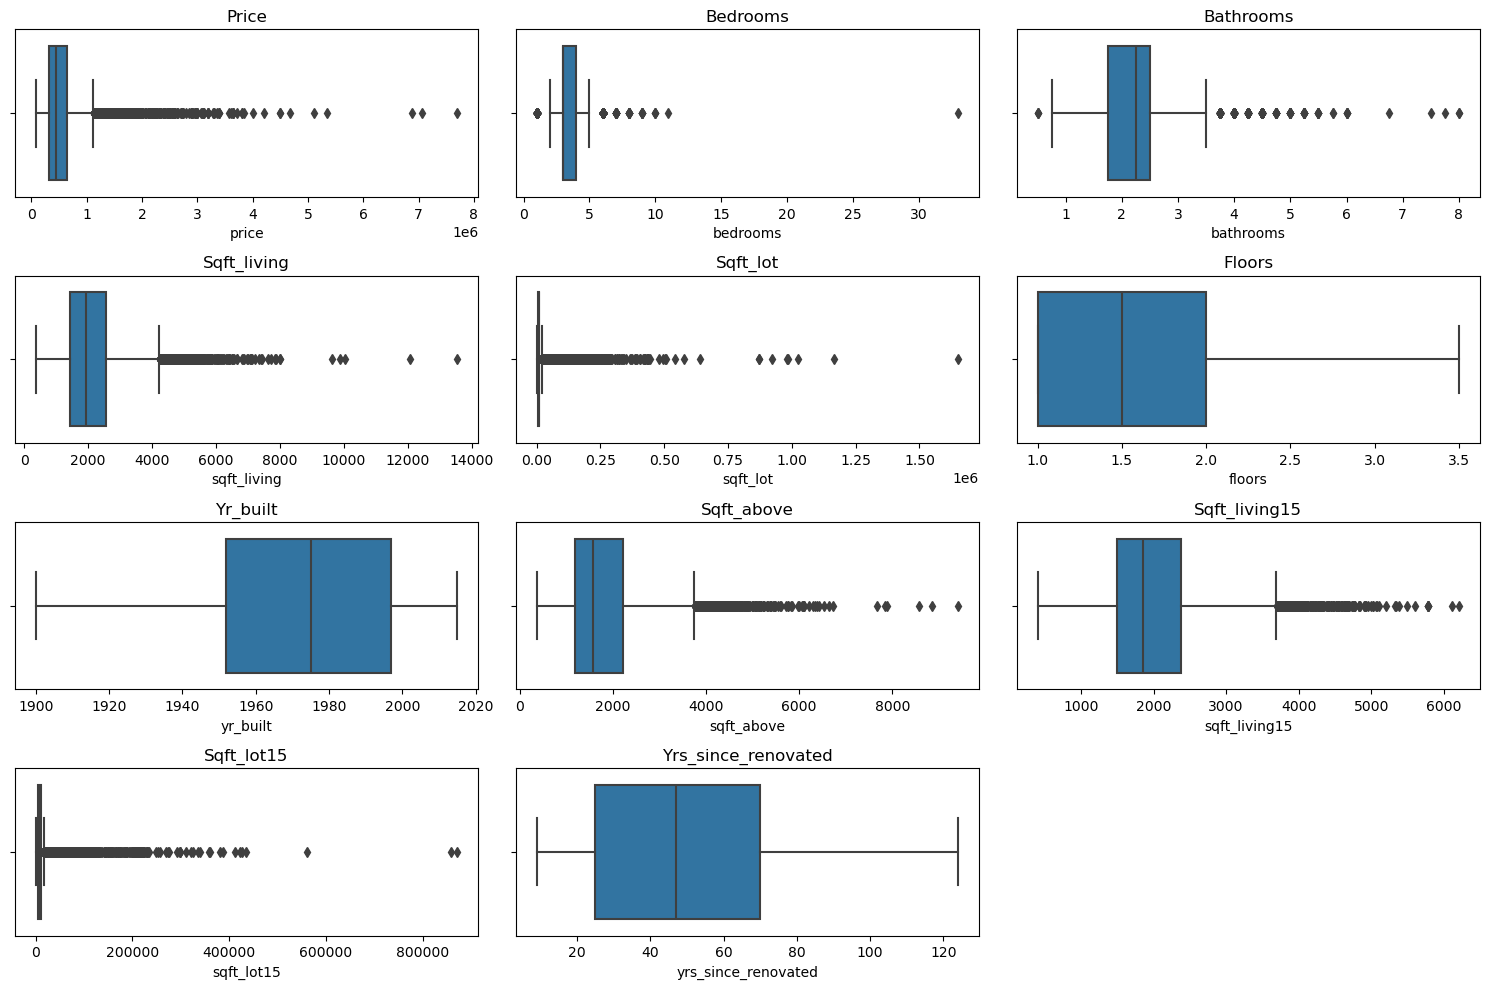

In [23]:
# Selecting numeric columns
numeric_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'yrs_since_renovated']

# Create box plots for all numeric columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=data[column])
    plt.title(f'{column.capitalize()}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

> It is evident that most of the features have outliers in them. Outliers can lead to incorrect inferences and conclusions about the underlying relationship between variables. They also violate the assumptions of normality and linearity, so we remove them.

### 3.2 Removing outliers

In [24]:
def find_outlier_limits(column, num_std=3):
    
    mean = np.mean(column)
    std_dev = np.std(column)
    
    lower_limit = mean - num_std * std_dev
    upper_limit = mean + num_std * std_dev
    
    return lower_limit, upper_limit
find_outlier_limits(data['sqft_living'],num_std=3)

(-673.041761831078, 4844.074881281464)

In [25]:
def filter_outliers(data, num_std=3,exclude_columns = []):
    
    filtered_data = data.copy()

    for col in data.columns:
        if pd.api.types.is_numeric_dtype(data[col]) and col not in exclude_columns:
            lower_limit, upper_limit = find_outlier_limits(data[col], num_std)
            print(f"Column: {col}, Lower Limit: {lower_limit}, Upper Limit: {upper_limit}")
            outliers_removed = data[(data[col] < lower_limit) | (data[col] > upper_limit)].shape[0]
            print(f"Outliers removed in column '{col}': {outliers_removed}")
            outliers_mask = (data[col] < lower_limit) | (data[col] > upper_limit)
            
            filtered_data = filtered_data[~outliers_mask]
    
    return filtered_data


columns_to_exclude = ['view_rating', 'yr_built', 'yr_renovated','price', 'grade', 'waterfront_bool']
clean_data = filter_outliers(data,num_std=3,exclude_columns =columns_to_exclude)
print('Original data:', len(data))
print('Filtered data:', len(clean_data))

Column: bedrooms, Lower Limit: 0.5762569078209379, Upper Limit: 6.181277605109258
Outliers removed in column 'bedrooms': 43
Column: bathrooms, Lower Limit: -0.1794986487457817, Upper Limit: 4.422515046438438
Outliers removed in column 'bathrooms': 133
Column: sqft_living, Lower Limit: -673.041761831078, Upper Limit: 4844.074881281464
Outliers removed in column 'sqft_living': 177
Column: sqft_lot, Lower Limit: -110701.86284098103, Upper Limit: 141274.18275802038
Outliers removed in column 'sqft_lot': 256
Column: floors, Lower Limit: -0.1221005018527288, Upper Limit: 3.111211915424574
Outliers removed in column 'floors': 6
Column: sqft_above, Lower Limit: -693.7102422541473, Upper Limit: 4281.12070307468
Outliers removed in column 'sqft_above': 184
Column: sqft_basement, Lower Limit: -1038.2440259879004, Upper Limit: 1621.866684617753
Outliers removed in column 'sqft_basement': 177
Column: lat, Lower Limit: 47.143037055978205, Upper Limit: 47.9754821870058
Outliers removed in column 'lat

### 3.3 Checking for Normal Distribution

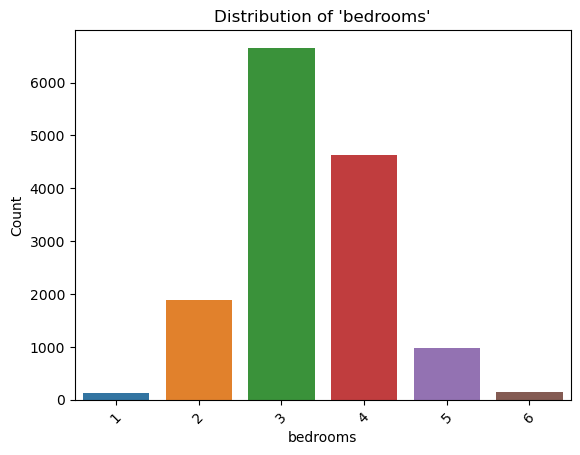

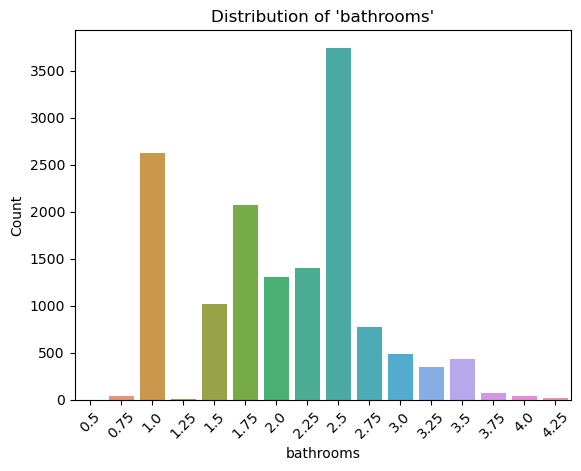

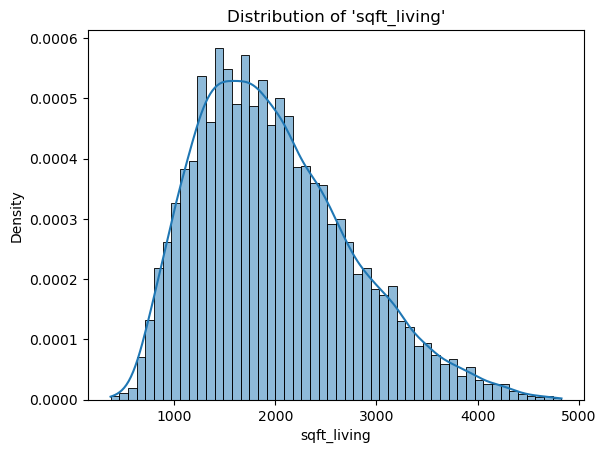

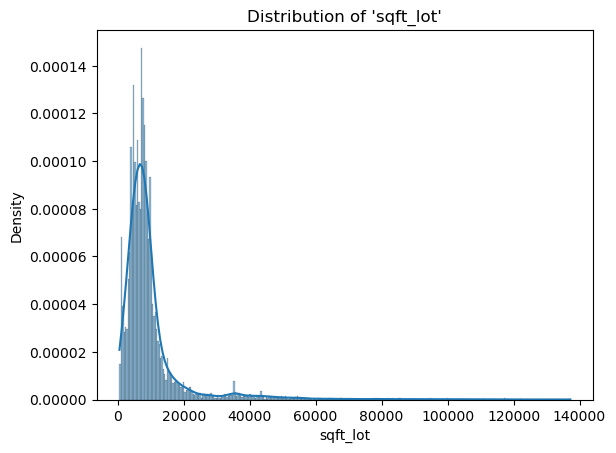

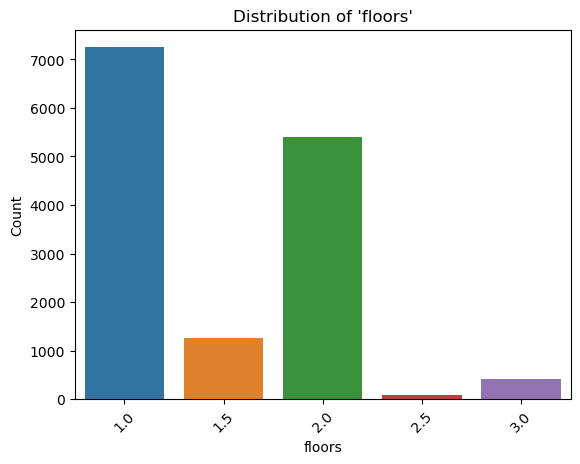

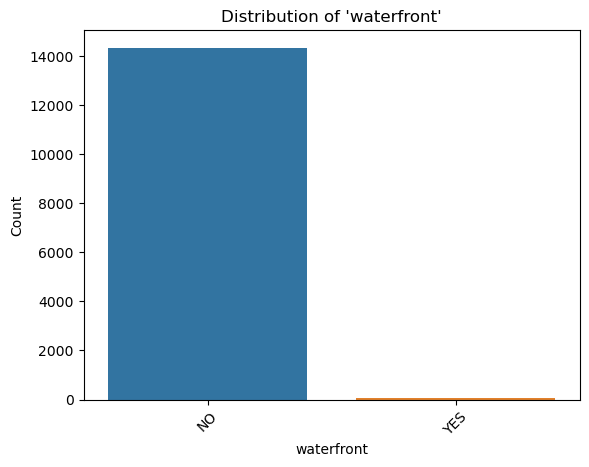

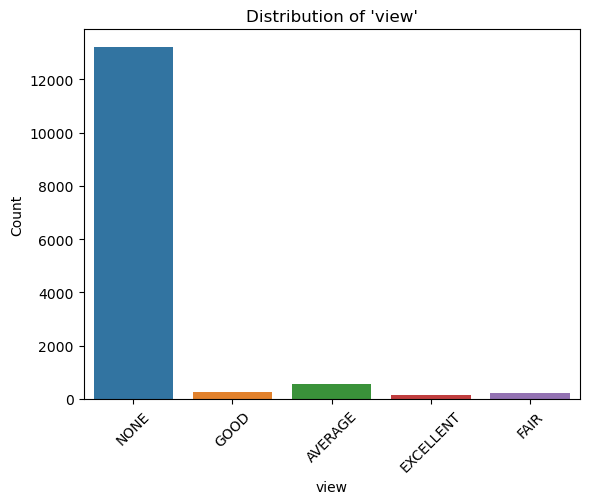

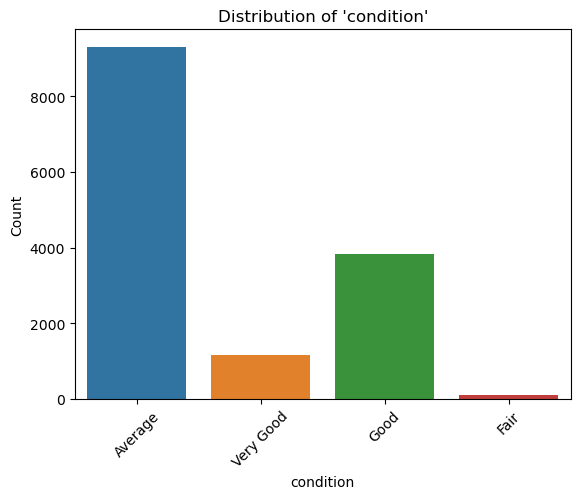

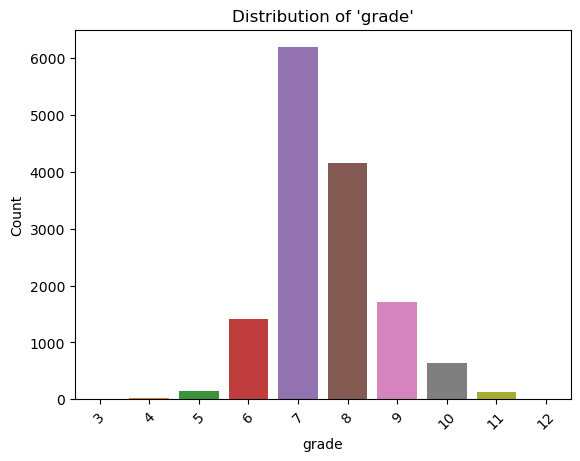

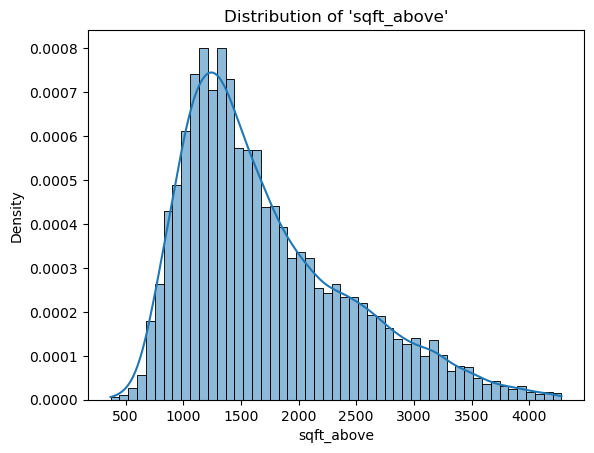

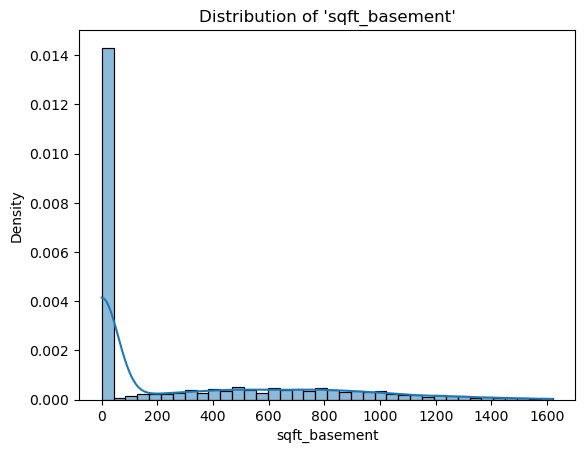

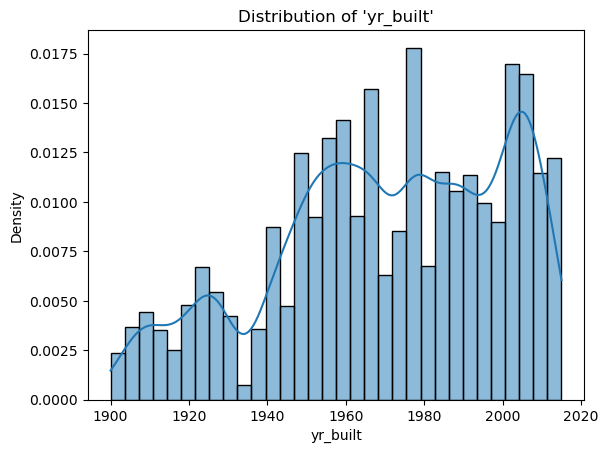

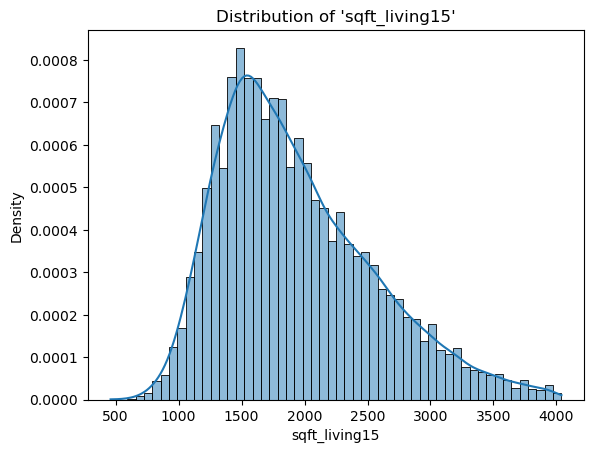

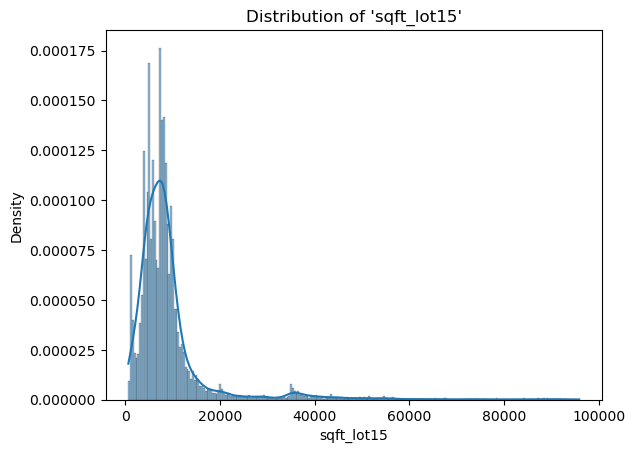

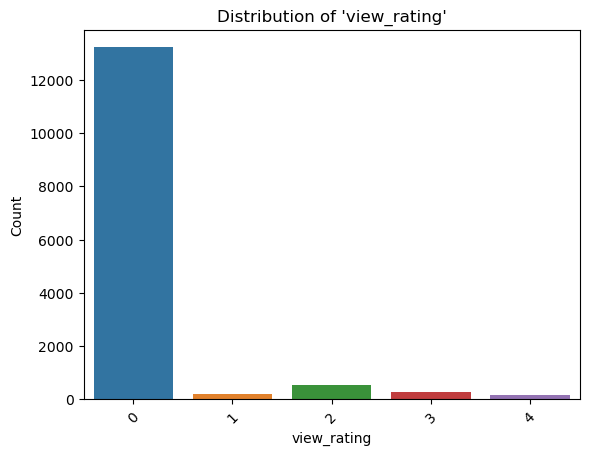

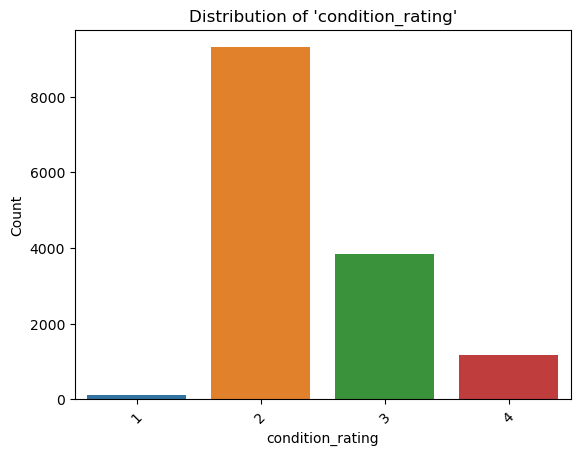

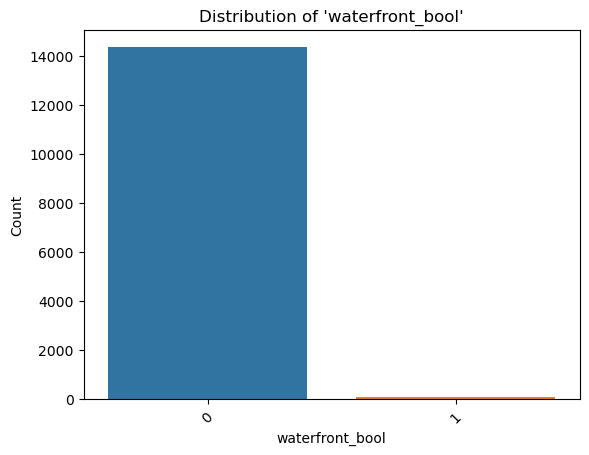

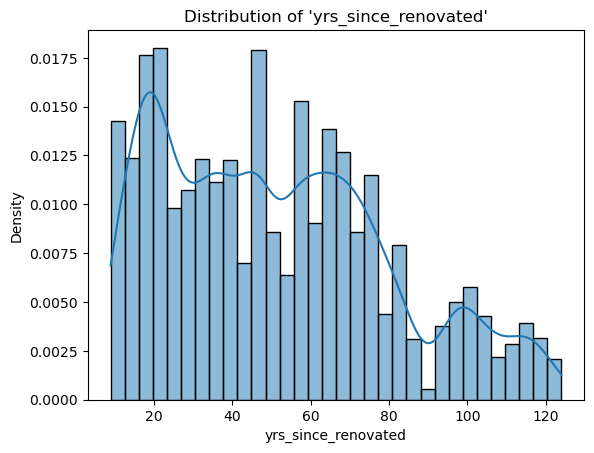

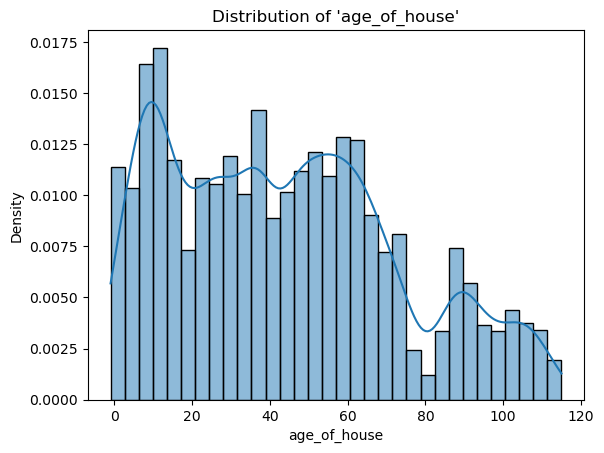

In [26]:
# Check for normal distribution
def check_normal_distribution(data,exclude_columns=[]):
   
    for col in clean_data.columns:
        if clean_data[col].dtype == 'object' or clean_data[col].nunique() < 20:
            # If the column is categorical or has less than 20 unique values, use countplot
            sns.countplot(data=clean_data, x=col)
            plt.title(f"Distribution of '{col}'")
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(rotation=45) 
            plt.show()
        elif pd.api.types.is_numeric_dtype(clean_data[col]) and col not in exclude_columns:
            sns.histplot(clean_data[col], kde=True, stat="density")
            plt.title(f"Distribution of '{col}'")
            plt.xlabel(col)
            plt.ylabel('Density')
            plt.show()


exclude = ['price','yr_renovated', 'view_rating', 'condition_rating', 'long','lat', 'waterfront_bool']
check_normal_distribution(clean_data,exclude_columns=exclude)

# Data Analysis

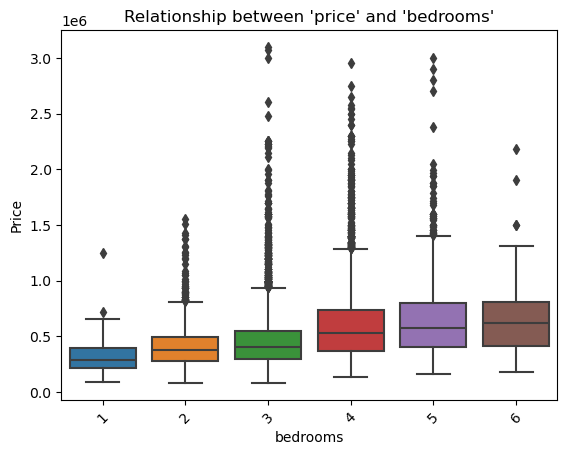

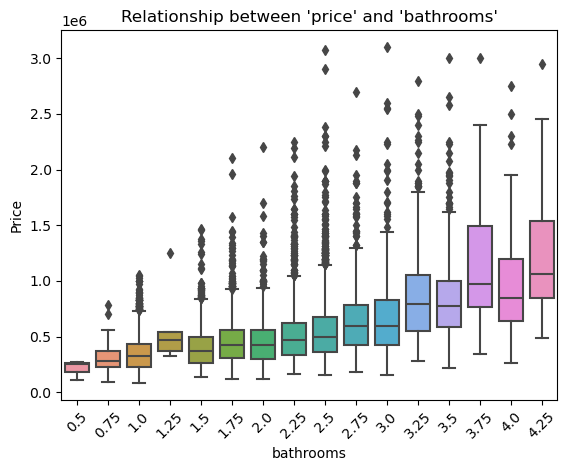

Correlation coefficient between 'price' and 'sqft_living': 0.6353261333901958


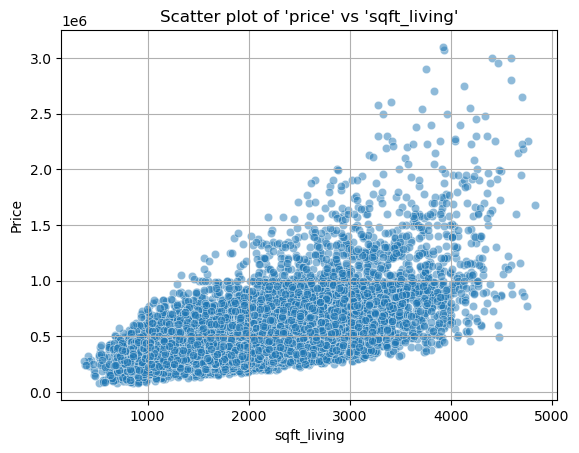

Correlation coefficient between 'price' and 'sqft_lot': 0.0977674267220726


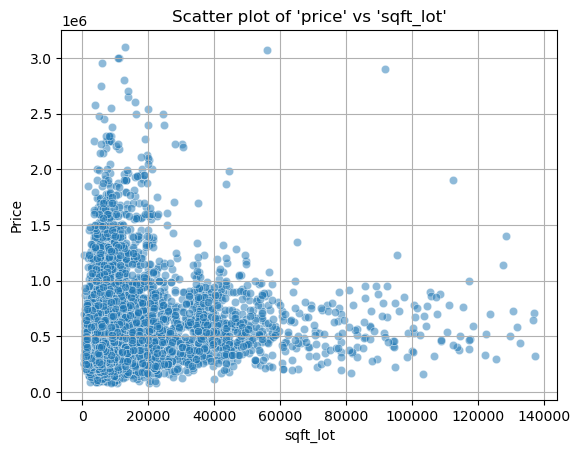

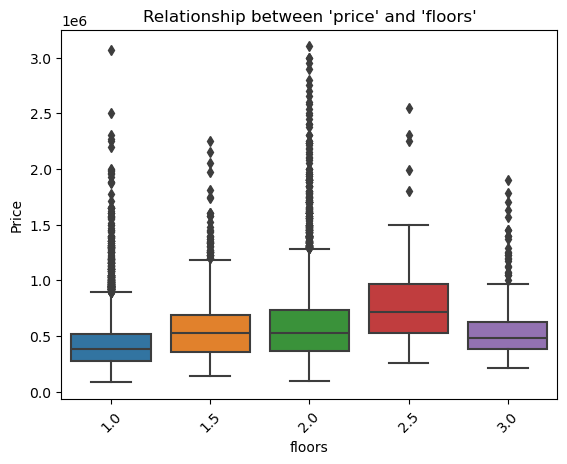

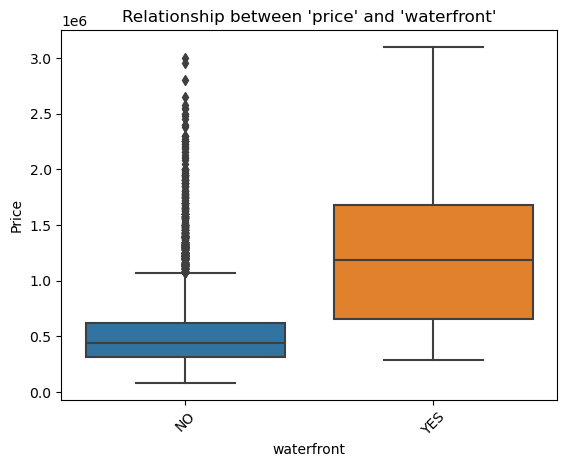

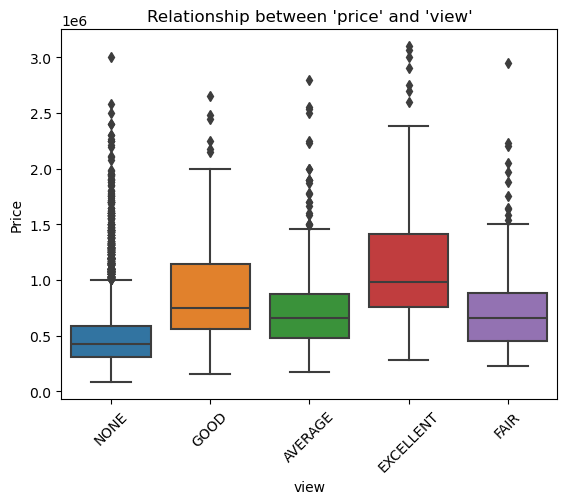

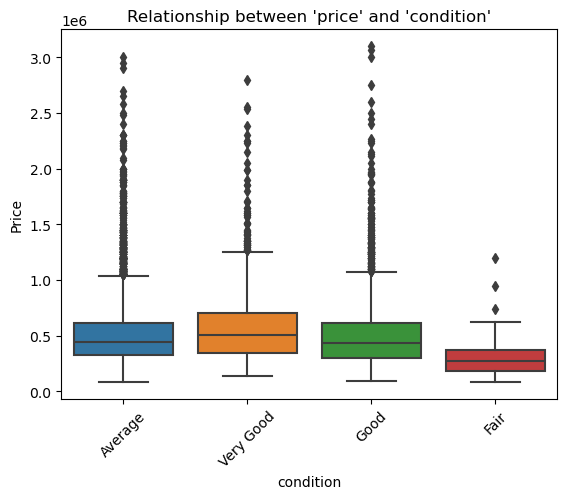

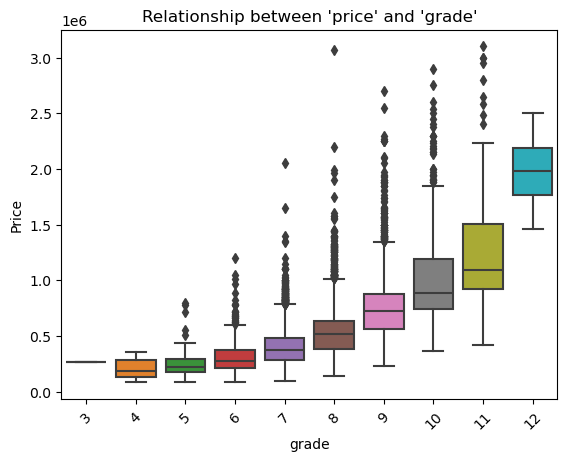

Correlation coefficient between 'price' and 'sqft_above': 0.5346510365691014


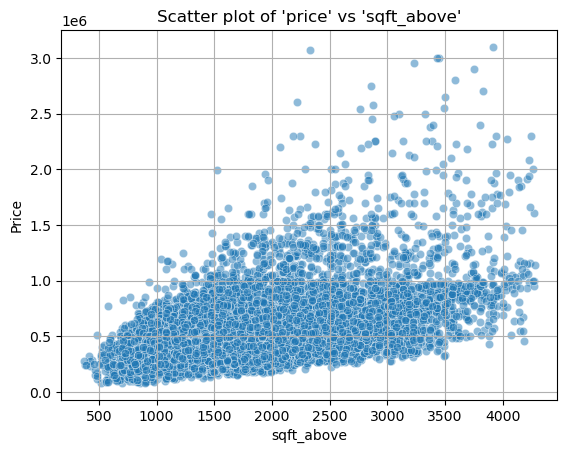

Correlation coefficient between 'price' and 'sqft_basement': 0.2513992268831492


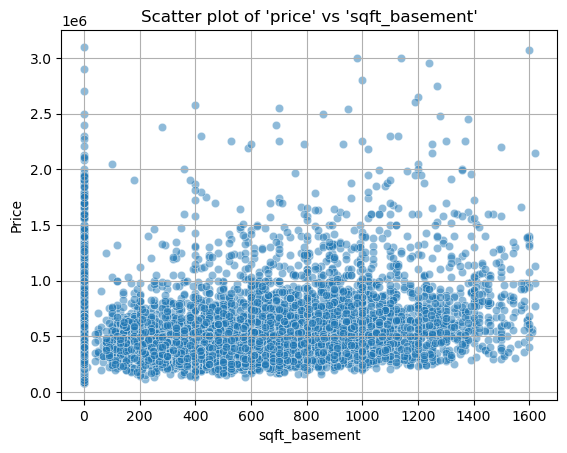

Correlation coefficient between 'price' and 'yr_built': 0.01923519758000601


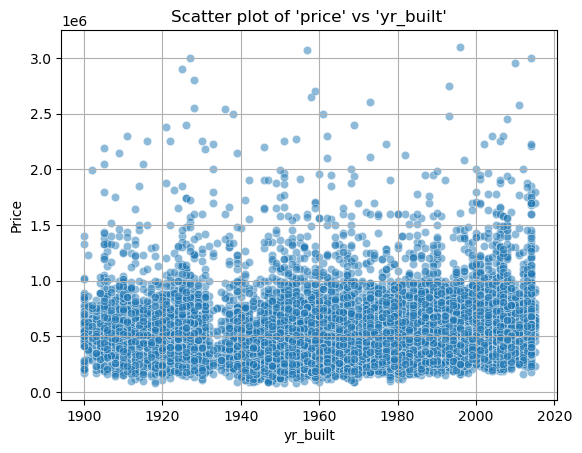

Correlation coefficient between 'price' and 'sqft_living15': 0.5557910122903528


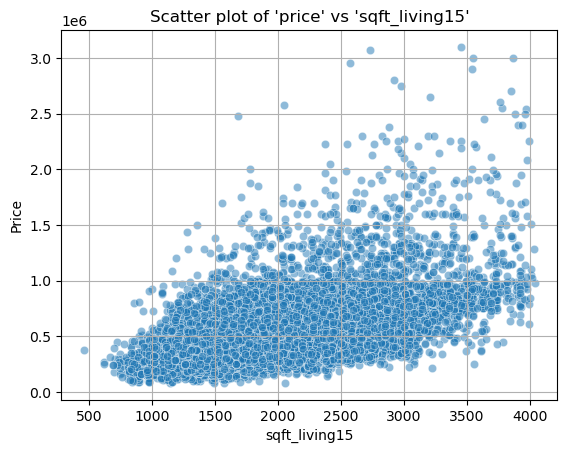

Correlation coefficient between 'price' and 'sqft_lot15': 0.08913149207621411


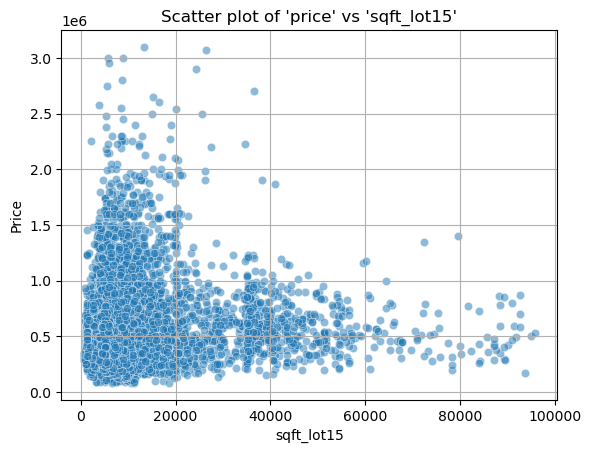

Correlation coefficient between 'price' and 'yrs_since_renovated': -0.07029011749854071


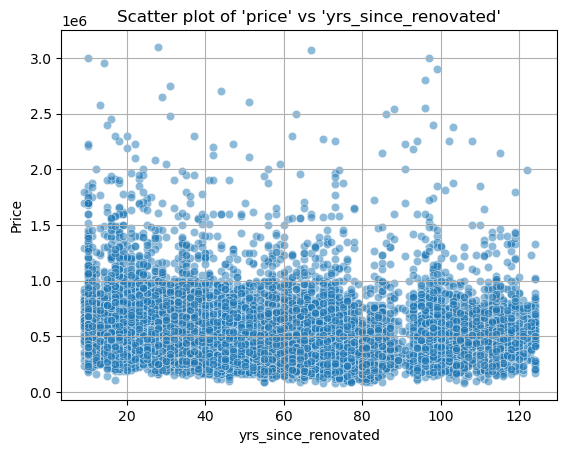

Correlation coefficient between 'price' and 'age_of_house': -0.01895738334269159


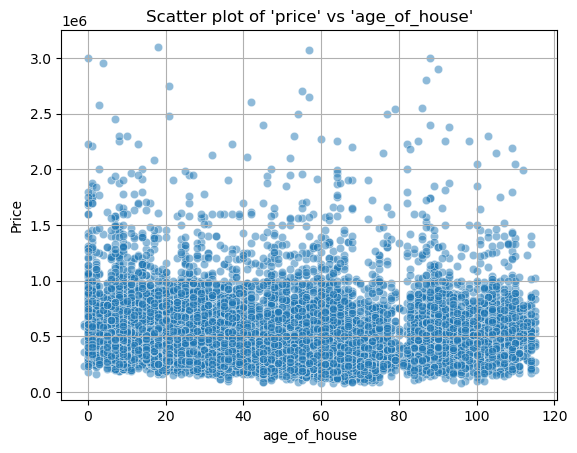

In [27]:
def correlation_and_scatterplots(data, discrete_columns, exclude_columns=[]):
    
  for col in data.columns:
    
    if col in discrete_columns:
        
        sns.boxplot(data=data, x=col, y='price')
        # sns.swarmplot(data=data, x=col, y='price')  # Uncomment this line for swarm plot instead of box plot
        plt.title(f"Relationship between 'price' and '{col}'")
        plt.xlabel(col)
        plt.ylabel('Price')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
        plt.show()
    elif pd.api.types.is_numeric_dtype(data[col]) and col not in exclude_columns:
        correlation = data['price'].corr(data[col])
        print("=================================================================================")
        print(f"Correlation coefficient between 'price' and '{col}': {correlation}")
        print("=================================================================================")
        sns.scatterplot(data=data, x=col, y='price', alpha=0.5)
        plt.title(f"Scatter plot of 'price' vs '{col}'")
        plt.xlabel(col)
        plt.ylabel('Price')
        plt.grid(True)
        plt.show()

exclude = ['yr_renovated', 'price', 'view_rating', 'condition_rating', 'lat', 'long', 'waterfront_bool']
discrete_columns = ['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade', 'waterfront']
correlation_and_scatterplots(clean_data, discrete_columns, exclude_columns=exclude)

>**Summary:** Continuous data with the highest correlations with price include : `sqft_living`, `sqft_above`, `sqft_living15` while those with the lowest correlations include: `sqft_lot`, `yr_built`, `sqft_lot15` and `yrs_since_renovated`. `sqft_basement` has a moderate correlaton.

>For the discrete data; increase in `bedrooms`,`bathrooms`, `grade`, and `waterfront` seem to show a correlational increase in the median price as well as a greater spread of prices in some cases. While features such as `condition`, `view` and `floors` showed an increase to a certain extent indicating that there is an optimum value for these features.

# Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
* Train/Test Split; 80:20, 70:30, 60:40
* 
Regression models, SLR, MLR, Naive Bayes

***

In [ ]:
# Here you run your code to model the data


# Regression Results

* Metrics for regression;

# Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

# Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
* Findings; Analysis, Modeling
***